<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/fraud_analyst_assignment/blob/main/02_descriptive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First let's mount Google Drive so we can navigate the folders as needed
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Let's import some much needed libraries...**

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
import xlrd
print('done!')

done!


**Let's save all the colors and styles from matplotlib for our plots**

In [84]:
# Let's get all the colors available in matplotlib
other_colors = []
darker_colors = []
for name, hex in mpl.colors.cnames.items():
    if 'dark' in name:
        darker_colors.append(name)
    else:
        other_colors.append(name)

# Let's finally save the various plot styles in matplotlib
styles = plt.style.available

print(f'darker-colors has {len(darker_colors)},\nother-colors has {len(other_colors)} colors\nplotting styles are {len(styles)}')

darker-colors has 19,
other-colors has 129 colors
plotting styles are 26


In [159]:
# set more matplotlib defaults
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['text.color'] = 'k'

# Set the plots design to xkcd
plt.xkcd()  # For xkcd style plots
#plt.rcdefaults()  # to stop xkcd plots

# fontdict for plot titles
fontDict1 = {'fontfamily': 'fantasy',
             'fontsize': 'x-large',
             'fontstyle': 'italic',
             'fontweight': 'heavy',
             'ha': 'center',
             'color': 'darkred',
             'va': 'baseline'}

# fontdict for plot labels
fontDict2 = {'fontfamily': 'fantasy',
             'fontsize': 'medium',
             'fontstyle': 'oblique',
             'fontweight': 'semibold',
             'ha': 'center',
             'color': 'black',
             'va': 'baseline'}

**Let's change our Directory to the Fraud directory containing our data**

In [123]:
FRAUD_DIR = '/content/gdrive/MyDrive/Colab_Notebooks/fraud_analyst_assignment'
os.chdir(FRAUD_DIR)
print(f'Current Dir: {os.getcwd()}')

Current Dir: /content/gdrive/MyDrive/Colab_Notebooks/fraud_analyst_assignment


In [160]:
# Let's see the contents of the CWD
os.listdir()

['02_descriptive_analytics.ipynb',
 'Fraud_sample_data.xlsx',
 'questionsAndPoints.gdoc',
 '.ipynb_checkpoints',
 '01_intro_to_fraud_analysis.ipynb',
 '03_diagnostic_analytics.ipynb',
 '04_predictive_analytics.ipynb',
 '05_prescriptive_analytics.ipynb',
 'fraud_analysis.ipynb']

The dataset contains 3 sheets, the first at index 0 is the data dictionary, the remaining two at indexes 1 and 2 are June and July transactions respectively.<br>**Let's read out the data dictionary to guide us**

In [161]:
pd.set_option('max_colwidth', None)  # So that we see full field descriptions
data_dict = pd.read_excel('Fraud_sample_data.xlsx', sheet_name=0)
data_dict

,Field name,Field description
0,merchant_id,Randomly generated identifier to represent a merchant
1,merchant_industry,Industry in which the merchant operates
2,merchant_category,Business category of the merchant
3,merchant_country,The country in which the merchant is based
4,currency,The local currency the transcation was processed in
5,transaction_week_start_date,Week in which the transaction occured
6,channel,The payment method for the transaction
7,transaction_count,The number of transactions for the day
8,transaction_volume_usd,The total value of the transactions converted to USD
9,fraud_count,The number of transactions which were reported as fraudulent for the day


**Now, let's read in the respective data for the months of June and July...**

In [162]:
# For June transactions
june_df = pd.read_excel('Fraud_sample_data.xlsx', sheet_name=1)

# For July transactions
july_df = pd.read_excel('Fraud_sample_data.xlsx', sheet_name=2)
print('done!')

done!


In [163]:
# Let's see the june and july data shapes
print(f'June data shape: {june_df.shape}\nJuly data shape: {july_df.shape}\n')

June data shape: (8609, 13)
July data shape: (8809, 13)



We can see that July transactions have more observations than June, precisely 200 more.<br>But they both have the same dimensions of 13 features. Let's see the head and tail of June.

In [164]:
june_df.head()

,merchant_id,merchant_industry,merchant_category,merchant_country,currency,transaction_week_start_date,channel,transaction_count,transaction_volume_usd,fraud_count,fraud_volume_usd,otp_fraud,otp_all_transactions
0,1,GOODS-PHYSICAL,e-Commerce,Nigeria,NGN,2021-06-07,card,5,231.590551,0,NaN,0,5
1,5,SERVICES-LEGAL,Other,Nigeria,NGN,2021-06-07,card,2,210.203412,0,NaN,0,2
2,9,TRAVEL,Travel & Hospitality,Nigeria,NGN,2021-06-07,card,4,223.097113,0,NaN,0,1
3,11,SERVICES-PROFESSIONAL,Other,Nigeria,NGN,2021-06-07,card,5,212.335958,0,NaN,0,5
4,15,SERVICES-DIGITAL,Digital Services,Nigeria,NGN,2021-06-07,card,8,550.131234,0,NaN,0,8


In [165]:
june_df.tail()

,merchant_id,merchant_industry,merchant_category,merchant_country,currency,transaction_week_start_date,channel,transaction_count,transaction_volume_usd,fraud_count,fraud_volume_usd,otp_fraud,otp_all_transactions
8604,8605,INTERNET,Utilities,Nigeria,NGN,2021-06-28,card,1,2.624672,0,NaN,0,1
8605,8606,GOODS-DIGITAL,Digital Services,Nigeria,NGN,2021-06-28,card,1,0.262467,0,NaN,0,1
8606,8607,SERVICES-DIGITAL,Digital Services,Nigeria,NGN,2021-06-28,card,3,15.748031,0,NaN,0,3
8607,8608,EVENTS,Travel & Hospitality,Nigeria,NGN,2021-06-28,card,2,0.656168,0,NaN,0,2
8608,8609,INTERNET,Utilities,Nigeria,NGN,2021-06-28,card,1,0.262467,0,NaN,0,1


**Let's see the head and tail of July**

In [166]:
july_df.head()

,merchant_id,merchant_industry,merchant_category,merchant_country,currency,transaction_week_start_date,channel,transaction_count,transaction_volume_usd,fraud_count,fraud_volume_usd,otp_fraud,otp_all_transactions
0,1,GOODS-PHYSICAL,e-Commerce,Nigeria,NGN,2021-07-05,card,3,54.173228,0,NaN,0,3
1,5,SERVICES-LEGAL,Other,Nigeria,NGN,2021-07-05,card,4,486.712598,0,NaN,0,4
2,8,TRAVEL,Travel & Hospitality,Nigeria,NGN,2021-07-05,card,3,118.110236,0,NaN,0,0
3,9,SERVICES-PROFESSIONAL,Other,Nigeria,NGN,2021-07-05,card,4,151.968504,0,NaN,0,3
4,12,SERVICES-DIGITAL,Financial Services,Nigeria,NGN,2021-07-05,card,15,659.055118,0,NaN,0,12


In [167]:
july_df.tail()

,merchant_id,merchant_industry,merchant_category,merchant_country,currency,transaction_week_start_date,channel,transaction_count,transaction_volume_usd,fraud_count,fraud_volume_usd,otp_fraud,otp_all_transactions
8804,8805,SERVICES-DIGITAL,Digital Services,Nigeria,NGN,2021-07-26,card,1,0.524934,0,NaN,0,1
8805,8806,SERVICES-DIGITAL,Digital Services,Nigeria,NGN,2021-07-26,card,1,0.259843,0,NaN,0,1
8806,8807,SERVICES-DIGITAL,Digital Services,Nigeria,NGN,2021-07-26,card,5,2.624672,0,NaN,0,5
8807,8808,RESTAURANTS,Travel & Hospitality,Nigeria,NGN,2021-07-26,card,2,1.049869,0,NaN,0,1
8808,8809,GOODS-PHYSICAL,e-Commerce,Nigeria,NGN,2021-07-26,card,1,1.312336,0,NaN,0,1


# Descriptive EDA (DA1):

**Descriptive analytics (DA1):** <br>is a preliminary stage of data processing that creates a summary of historical data to yield useful information and possibly prepare the data for further analysis. It is used largely to answer the question **[‘What happened?’]**. Querying, reporting, data aggregation, data mining and data visualization may be applied to yield more insight.

**Geo-Location-based DA1:**<br>
1. What is the distribution of transactions across the 3 countries?
2. What is the Fraud/Transactions Ratio per country?

**Fraud-related DA1:**<br>
3. What is the Max and Mean fraud value for June and July?
4. What is the total fraud recorded for June and July?
5. Drilling into OTP-Fraud, what’s the Max and Mean values monthly?
6. What is the Max and Mean dollar cost of fraud for June and July?
7. What is the ratio of fraudulent/non-fraudulent transactions monthly

Answering these questions, give us a top-level vision of the state of the transactions and fraudulent activities and their impacts across the 3 countries the business operates in.


### 1. Confirming the data-types

In [168]:
june_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8609 entries, 0 to 8608
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   merchant_id                  8609 non-null   int64         
 1   merchant_industry            8609 non-null   object        
 2   merchant_category            8609 non-null   object        
 3   merchant_country             8609 non-null   object        
 4   currency                     8609 non-null   object        
 5   transaction_week_start_date  8609 non-null   datetime64[ns]
 6   channel                      8609 non-null   object        
 7   transaction_count            8609 non-null   int64         
 8   transaction_volume_usd       8609 non-null   float64       
 9   fraud_count                  8609 non-null   int64         
 10  fraud_volume_usd             61 non-null     float64       
 11  otp_fraud                    8609 non-null 

In [169]:
july_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   merchant_id                  8809 non-null   int64         
 1   merchant_industry            8809 non-null   object        
 2   merchant_category            8809 non-null   object        
 3   merchant_country             8809 non-null   object        
 4   currency                     8809 non-null   object        
 5   transaction_week_start_date  8809 non-null   datetime64[ns]
 6   channel                      8809 non-null   object        
 7   transaction_count            8809 non-null   int64         
 8   transaction_volume_usd       8809 non-null   float64       
 9   fraud_count                  8809 non-null   int64         
 10  fraud_volume_usd             51 non-null     float64       
 11  otp_fraud                    8809 non-null 

So, we can see the data-types for the months of June and July. They conform to the expected data-types. All columns that should be numeric are and all that should be categorical or object are too.

### 2. Checking the Descriptive Statistics of the data:

In [170]:
# For June numeric features

june_df.describe().T

,count,mean,std,min,25%,50%,75%,max
merchant_id,8609.0,4304.018469,2485.466539,1.000000,2153.000000,4304.000000,6456.000000,8.609000e+03
transaction_count,8609.0,485.230573,8253.372691,1.000000,1.000000,3.000000,11.000000,2.758660e+05
transaction_volume_usd,8609.0,7000.276672,73800.550994,0.000026,9.186352,43.307087,236.220472,2.396408e+06
fraud_count,8609.0,0.108375,3.175327,0.000000,0.000000,0.000000,0.000000,1.700000e+02
fraud_volume_usd,61.0,1858.473460,4641.861843,0.524934,26.246719,91.338583,539.212598,2.017848e+04
otp_fraud,8609.0,0.009293,0.265166,0.000000,0.000000,0.000000,0.000000,1.700000e+01
otp_all_transactions,8609.0,81.615402,589.620590,0.000000,1.000000,2.000000,9.000000,1.222300e+04


In [171]:
# For July numeric features

july_df.describe().T

,count,mean,std,min,25%,50%,75%,max
merchant_id,8809.0,4404.009536,2543.190394,1.000000,2201.000000,4405.000000,6607.000000,8.809000e+03
transaction_count,8809.0,452.862300,7493.961064,1.000000,1.000000,3.000000,12.000000,2.321840e+05
transaction_volume_usd,8809.0,6456.769974,65039.969627,0.000026,9.186352,43.307087,237.270341,2.444412e+06
fraud_count,8809.0,0.044386,1.144114,0.000000,0.000000,0.000000,0.000000,6.200000e+01
fraud_volume_usd,51.0,1261.399492,2420.278420,0.262467,21.900997,132.545932,1040.682415,9.956378e+03
otp_fraud,8809.0,0.006925,0.187173,0.000000,0.000000,0.000000,0.000000,1.000000e+01
otp_all_transactions,8809.0,156.574753,3732.010232,0.000000,1.000000,2.000000,9.000000,2.015910e+05


We can see that there's complete count for all numeric columns except `fraud_volume_usd` which has a count of 61 in June and 51 in July. This depicts missing values present. We can also observe the following...
1. Max `fraud_count` per day in June is 170, while in July is 62
2. Mean `fraud_volume_usd` in June is 1858, while in July is 1261. Note that these figures are large because we have only 61 and 51 data represented now, since the rest are NaN values in this column.
3. Max `fraud_volume_usd` in any given day in June is 20178, while July is 9956
4. For `otp_fraud`, the Max a day in June is 17, while July Max is 10
5. While June has Max `otp_all_transactions` a day as 12223 and July as 201591

**Let's see the count of unique merchants that did transactions for June and July**

In [172]:
june_merchant_count = june_df.merchant_id.nunique()
july_merchant_count = july_df.merchant_id.nunique()

print(f'Total Merchants for June: {june_merchant_count}\nTotal Merchants for July: {july_merchant_count}')

Total Merchants for June: 3866
Total Merchants for July: 3895


**So we had slightly more (about 29) merchants in July than June.**

In [173]:
# For June categoric features

june_df.describe(include='object').T

,count,unique,top,freq
merchant_industry,8609,63,GOODS-PHYSICAL,1358
merchant_category,8609,11,Digital Services,1601
merchant_country,8609,3,Nigeria,8577
currency,8609,4,NGN,8540
channel,8609,1,card,8609


In [174]:
# For July categoric features

july_df.describe(include='object').T

,count,unique,top,freq
merchant_industry,8809,62,GOODS-PHYSICAL,1356
merchant_category,8809,11,Other,1473
merchant_country,8809,3,Nigeria,8784
currency,8809,4,NGN,8744
channel,8809,1,card,8809


From the categorical features summary, we can see that...
1. There are 63 unique merchant industries in June and 62 in July,
2. There are 11 distinct merchant categories, and 3 distinct merchant countries, 4 distinct currencies and 1 distinct channel for both months, which is the `card` channel.

### 3. Checking for missing values:

In [175]:
june_df.isna().any()

merchant_id                    False
merchant_industry              False
merchant_category              False
merchant_country               False
currency                       False
transaction_week_start_date    False
channel                        False
transaction_count              False
transaction_volume_usd         False
fraud_count                    False
fraud_volume_usd                True
otp_fraud                      False
otp_all_transactions           False
dtype: bool

In [176]:
july_df.isna().any()

merchant_id                    False
merchant_industry              False
merchant_category              False
merchant_country               False
currency                       False
transaction_week_start_date    False
channel                        False
transaction_count              False
transaction_volume_usd         False
fraud_count                    False
fraud_volume_usd                True
otp_fraud                      False
otp_all_transactions           False
dtype: bool

We can see that for both June and July, only `fraud_volume_usd` has missing values. On further investigation, it is clear to see why. This is so because when `fraud_count` is 0, then `fraud_volume_usd` defaults to NaN.<br>Since we know that `fraud_volume_usd` should be 0, when `fraud_count` is 0, let's override this accordingly.

In [177]:
# replacing all missing values in the fraud_volume_usd col to 0

june_df.fraud_volume_usd.fillna(0, inplace=True)
july_df.fraud_volume_usd.fillna(0, inplace=True)
print('done!')

done!


**Let's confirm that all missing values have been replaced**

In [178]:
june_df.isna().any()

merchant_id                    False
merchant_industry              False
merchant_category              False
merchant_country               False
currency                       False
transaction_week_start_date    False
channel                        False
transaction_count              False
transaction_volume_usd         False
fraud_count                    False
fraud_volume_usd               False
otp_fraud                      False
otp_all_transactions           False
dtype: bool

In [179]:
july_df.isna().any()

merchant_id                    False
merchant_industry              False
merchant_category              False
merchant_country               False
currency                       False
transaction_week_start_date    False
channel                        False
transaction_count              False
transaction_volume_usd         False
fraud_count                    False
fraud_volume_usd               False
otp_fraud                      False
otp_all_transactions           False
dtype: bool

### 4. Some basic visualization of June and July transactions:

**Let's explore the distribution of transactions across the distinct countries for June and July**

In [180]:
def compare_pie_chart(sup_title, titles, s1, s2, size, colours):
    """Pie chart to compare values for June and July
    
    @param suptitle: Str, summary title of the plot
    @param titles: List of string sub-titles per plot
    @param s1: first series object
    @param s2: second series object
    @param size: A tuple of figure size
    @param colours: A List of colors for the piecharts
    """
    plt.figure(figsize=size)
    sns.set(font_scale=1.2)
    sns.set_style('ticks')
    plt.suptitle(sup_title, y=1.05)

    # For the first plot
    plt.subplot(121)
    plt.pie(s1, 
       autopct='%1.1f%%',
       colors=colours,
       startangle=90,
       shadow=True,
       pctdistance=1.06)
    plt.title(titles[0], y=1.05, fontdict=fontDict1)
    plt.axis('equal')
    plt.legend(labels=s1.index, loc='upper right')

    # For the second plot
    plt.subplot(122)
    plt.pie(s2, 
       autopct='%1.1f%%',
       colors=colours,
       startangle=90,
       shadow=True,
       pctdistance=1.06)
    plt.title(titles[1], y=1.05, fontdict=fontDict1)
    plt.axis('equal')
    plt.legend(labels=s2.index, loc='upper right')

    plt.show()

In [181]:
countries = list(june_df.merchant_country.unique())

def get_country_transactions(countries, df1, df2):
    """Function to get total transactions per country

    @param countries: list of string country names
    @param df1 and df2: June and July Dataframes
    """

    s1_list = []
    s2_list = []

    for country in countries:
        temp1 = df1[df1['merchant_country'] == country]
        s1_list.append(sum(temp1['transaction_count']))

        temp2 = df2[df2['merchant_country'] == country]
        s2_list.append(sum(temp2['transaction_count']))
    
    s1 = pd.Series(s1_list, index=countries)
    s2 = pd.Series(s2_list, index=countries)

    return s1, s2 

In [182]:
june_country_split, july_country_split = get_country_transactions(countries, june_df, july_df)

In [183]:
june_country_split

Nigeria         4177313
Ghana                35
South Africa          2
dtype: int64

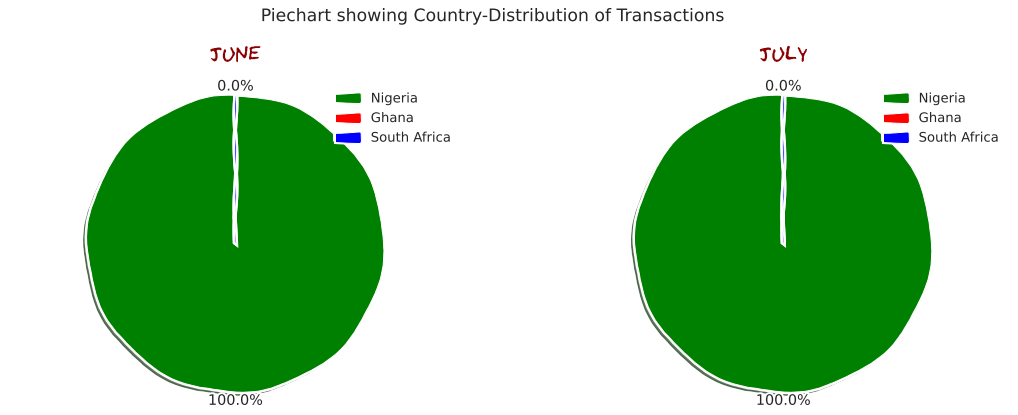

In [184]:
# Let's define some variables

sup_title = 'Piechart showing Country-Distribution of Transactions'
titles = ['June', 'July']
s1 = june_country_split
s2 = july_country_split
size = (18, 6)
colours = ['green','red','blue']

compare_pie_chart(sup_title, titles, s1, s2, size, colours)

In [185]:
ng_june_t = june_country_split['Nigeria']
ng_july_t = july_country_split['Nigeria']
gh_june_t = june_country_split['Ghana']
gh_july_t = july_country_split['Ghana']
sa_june_t = june_country_split['South Africa']
sa_july_t = july_country_split['South Africa']

print(f'In June, the country-transactions-count is:\nNigeria: {ng_june_t}\nGhana: {gh_june_t}\nSA: {sa_june_t}\n')
print()
print(f'In July, the country-transactions-count is:\nNigeria: {ng_july_t}\nGhana: {gh_july_t}\nSA: {sa_july_t}\n')

In June, the country-transactions-count is:
Nigeria: 4177313
Ghana: 35
SA: 2


In July, the country-transactions-count is:
Nigeria: 3989230
Ghana: 32
SA: 2



We can see from the three countries represented in the data, that Nigeria alone has over 99.7% of all transactions. Thus, I can assume that more fraudulent activities occur within Nigeria.<br>
* SA has only 2 transactions per month
* Ghana has just about 35 per month
* Nigeria has about 4 million transactions monthly.

**But before I jump to conclusions, let's see the percentage distribution of total fraud per country transactions.**

In [186]:
def get_country_fraud_pct_df(df):
    country_ratio = []

    for country in countries:
        country_df = df[df['merchant_country'] == country]
        ratio = sum(country_df.fraud_count) / sum(country_df.transaction_count)
        pct = ratio * 100
        country_ratio.append(pct)

    final_df = pd.DataFrame(country_ratio, index=countries, columns=['Pct'])

    return final_df

In [187]:
june_country_fraud_ratio = get_country_fraud_pct_df(june_df)
july_country_fraud_ratio = get_country_fraud_pct_df(july_df)

june_country_fraud_ratio

,Pct
Nigeria,0.022335
Ghana,0.000000
South Africa,0.000000


In [216]:
def compare_bar_chart(df1, df2, colours, col):
    plt.figure(figsize=size)
    sns.set(font_scale=1.2)
    sns.set_style('ticks')
    plt.suptitle(sup_title, y=1.05)

    # For June
    plt.subplot(121)
    plt.bar(x=df1.index, height=df1[col], data=df1, color= colours, width=0.5)
    plt.title(titles[0], fontdict=fontDict1)
    plt.xlabel(labels[0], fontdict=fontDict2)
    plt.ylabel(labels[1], fontdict=fontDict2)
    for x,y in zip(df1.index, df1[col]):
        label = round(y,2)  #  could also be written as:-   "{:.2f}".format(y)
        
        plt.annotate(label, # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0,4), # distance from text to points (x,y)
                    ha='center',) # horizontal alignment can be left, right or center


    # For July
    plt.subplot(122)
    plt.bar(x=df2.index, height=df2[col], data=df2, color= colours, width=0.5)
    plt.title(titles[1], fontdict=fontDict1)
    plt.xlabel(labels[0], fontdict=fontDict2)
    plt.ylabel(labels[1], fontdict=fontDict2)
    for x,y in zip(df2.index, df2[col]):
        label = round(y,2) 
        plt.annotate(label,
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,4),
                    ha='center',) 
    
    plt.show()

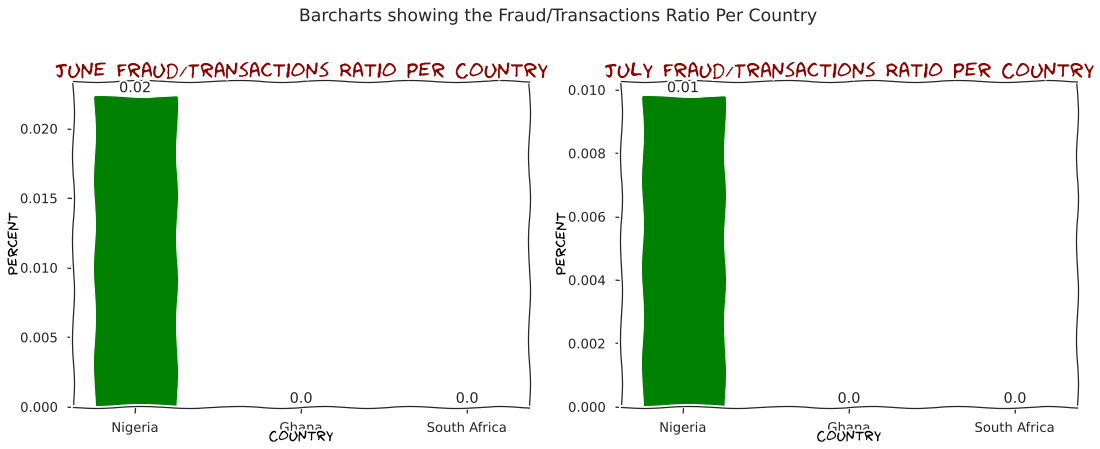

In [217]:
col='Pct'
sup_title = 'Barcharts showing the Fraud/Transactions Ratio Per Country'
titles = ['June Fraud/Transactions Ratio per Country', 'July Fraud/Transactions Ratio per Country']
labels = ['Country', 'Percent']

compare_bar_chart(june_country_fraud_ratio, july_country_fraud_ratio, colours, col)

Usually, only a small portion of transactions are fraudulent per organization.<br>This data shows us that...
1. Only Nigerian transactions recorded fraud
2. For June only 0.02% of transactions were flagged as fraud and only 0.01% in July
3. The data tends to depict that even with more transactions done in July, it had less fraud reports than in June.

**Let's visualize a few descriptive data values we deduced earlier**


In [218]:
indexs = ['max_fraud/Day', 'total_fraud/Month', 'max_otp_fraud/Day', 'ave_fraud_usd/Month','max_fraud_usd/Day']

june_data = [max(june_df.fraud_count), sum(june_df.fraud_count), max(june_df.otp_fraud), \
             june_df.fraud_volume_usd.mean(), max(june_df.fraud_volume_usd)]

july_data = [max(july_df.fraud_count), sum(july_df.fraud_count), max(july_df.otp_fraud), \
             july_df.fraud_volume_usd.mean(), max(july_df.fraud_volume_usd)]

In [246]:
def plot_clustered_bar(indexs, june_data, july_data):
    assert len(indexs) == len(june_data) == len(july_data)

    df = pd.DataFrame([june_data, july_data]).T
    df.index = indexs
    df.columns = ['June', 'July']

    # your colors
    colors = random.sample(darker_colors, 2)
    styl = random.sample(styles, 1)
    plt.style.use(styl)
    print(f'style: {styl}')

    # plot with annotations is probably easier
    p1 = df.plot(kind='bar', 
                 color=colors, 
                 figsize=(size), 
                 rot=0, 
                 ylabel='Count', 
                 fontsize=fontDict1['fontsize'],
                 title=title)
    plt.title(title,pad=20, fontdict=fontDict1)

    plt.show()

style: ['seaborn-pastel']


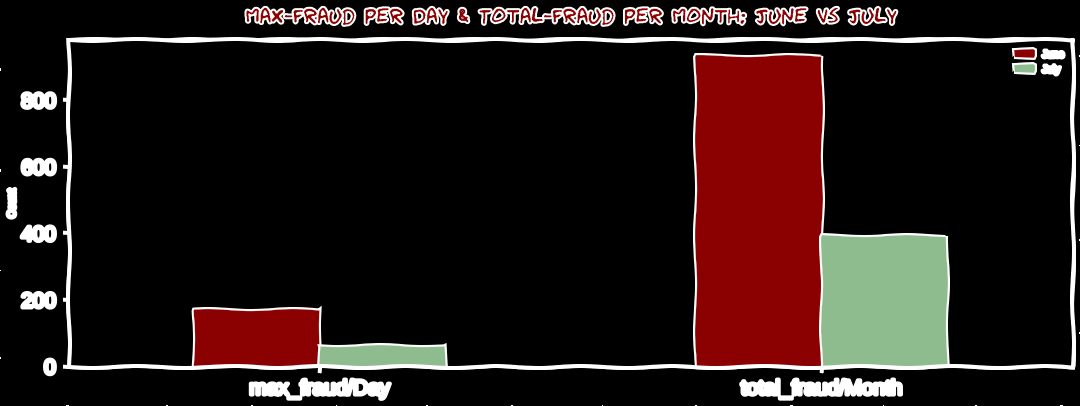

In [247]:
title = 'Max-Fraud per Day & Total-Fraud per Month: June vs July'
plot_clustered_bar(indexs[:2], june_data[:2], july_data[:2])

style: ['classic']


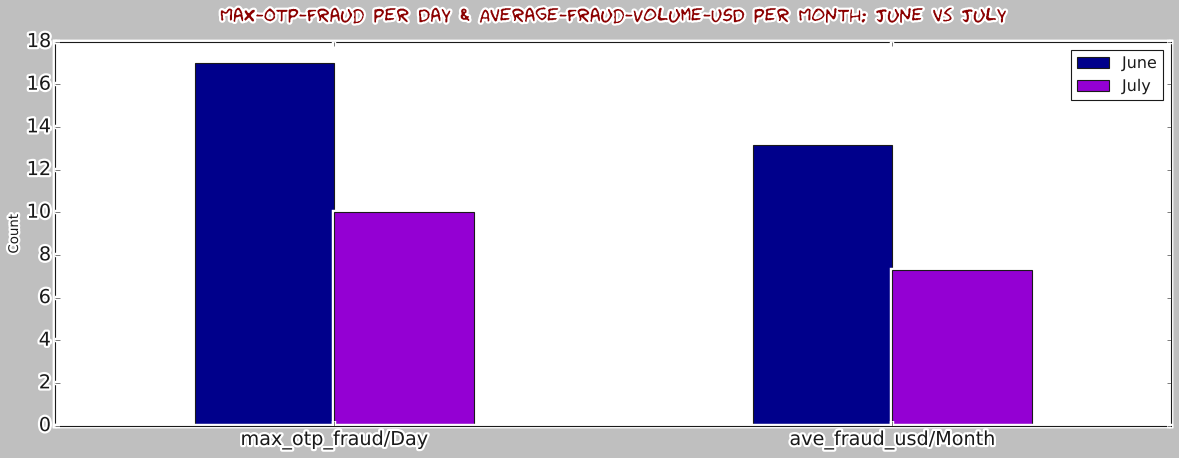

In [248]:
title = 'Max-Otp-Fraud per Day & Average-Fraud-Volume-USD per Month: June vs July'
plot_clustered_bar(indexs[2:4], june_data[2:4], july_data[2:4])

style: ['classic']


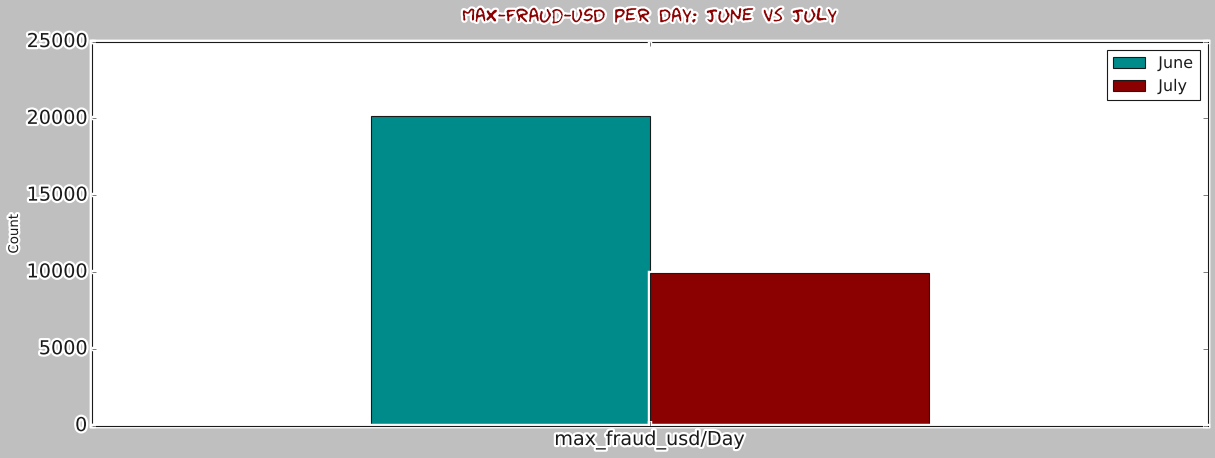

In [249]:
title = 'Max-Fraud-USD per Day: June vs July'
plot_clustered_bar(indexs[4:], june_data[4:], july_data[4:])

**Let's save computed Dataframes for the next stage..**

In [231]:
july_df.to_csv('july_df.csv', index=False)
june_df.to_csv('june_df.csv', index=False)
print('saved!')

saved!
